In [20]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def plot_elbow_method(data, clusters_range):
    inertias = []

    for i in clusters_range:
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    plt.plot(clusters_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

In [5]:
def plot_silhouette_method(data, clusters_range):
    silhouette_avg = []
    for n in clusters_range: 
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(data)
        cluster_labels = kmeans.labels_
        silhouette_avg.append(silhouette_score(data, cluster_labels))

    plt.plot(clusters_range,silhouette_avg,'bx-')
    plt.grid()
    plt.yticks(np.arange(0.2, 0.6, 0.1))
    plt.xlabel('Values of K') 
    plt.ylabel('Silhouette score')
    plt.title('Silhouette analysis For Optimal k')
    plt.show()
    return silhouette_avg

In [36]:
def run_kmeans(data, clusters):
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(data)
    return kmeans.labels_

In [7]:
def plot_kmeans(df, cmap, clusters, min_pc1=-5, min_pc2=-5, max_pc1=10, max_pc2=10):
    plt.figure(figsize=(12, 12))
    plt.scatter(df["PC1"], df["PC2"], c=df['Cluster'], cmap=cmap)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    for i, row in df.iterrows():
        if row["PC1"] < min_pc1 or row["PC2"] < min_pc2 or row["PC1"] > max_pc1 or row["PC2"] > max_pc2:
            plt.text(row["PC1"]-2, row["PC2"], row["Player"])
    plt.axis('equal')
    plt.colorbar(ticks=range(clusters))
    plt.show()

In [13]:
df = pd.read_csv('Artista_data/taylor_swift_spotify.csv', index_col=0)
df

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1,4WUepByoeqcedHoYhSNHRt,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,70,212600
1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2,0108kcWLnn2HlH2kedi1gn,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,71,231833
2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,3,3Vpk1hfMAQme8VJ0SNRSkd,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,72,231000
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,4,1OcSfkeCg9hRC2sFKB4IMJ,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,71,235800
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,5,2k0ZEeAqzvYMcx9Qt5aClQ,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,70,193289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Our Song,Taylor Swift,2006-10-24,11,15DeqWWQB4dcEWzJg15VrN,spotify:track:15DeqWWQB4dcEWzJg15VrN,0.111000,0.668,0.672,0.000000,0.3290,-4.931,0.0303,89.011,0.539,76,201106
526,I'm Only Me When I'm With You,Taylor Swift,2006-10-24,12,0JIdBrXGSJXS72zjF9ss9u,spotify:track:0JIdBrXGSJXS72zjF9ss9u,0.004520,0.563,0.934,0.000807,0.1030,-3.629,0.0646,143.964,0.518,62,213053
527,Invisible,Taylor Swift,2006-10-24,13,5OOd01o2YS1QFwdpVLds3r,spotify:track:5OOd01o2YS1QFwdpVLds3r,0.637000,0.612,0.394,0.000000,0.1470,-5.723,0.0243,96.001,0.233,58,203226
528,A Perfectly Good Heart,Taylor Swift,2006-10-24,14,1spLfUJxtyVyiKKTegQ2r4,spotify:track:1spLfUJxtyVyiKKTegQ2r4,0.003490,0.483,0.751,0.000000,0.1280,-5.726,0.0365,156.092,0.268,57,220146


In [10]:
n_clusters = range(2,15)

In [14]:
data = df.loc[:,~df.columns.isin(['name', 'album', 'release_date', 'id', 'uri'])]

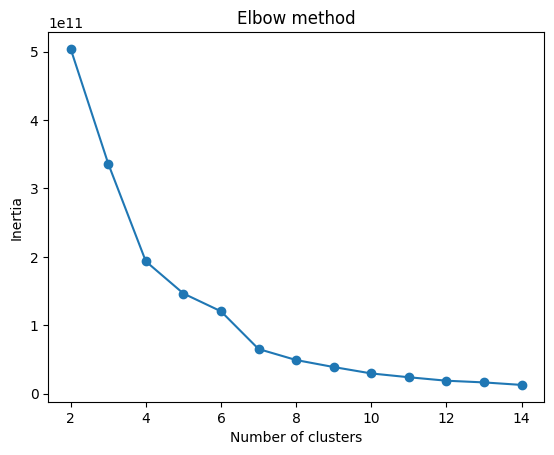

In [21]:
plot_elbow_method(data, n_clusters)

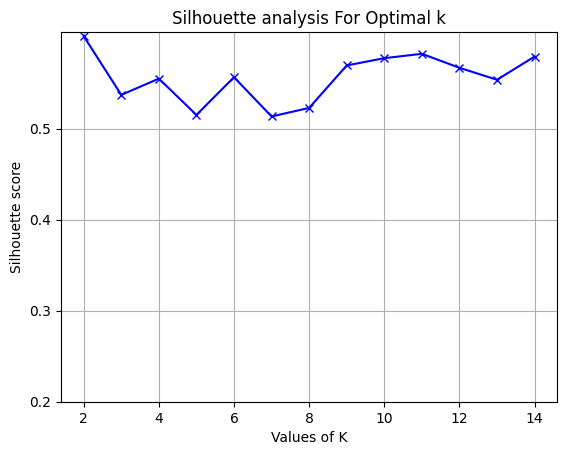

In [23]:
score = plot_silhouette_method(data, n_clusters)

In [25]:
score

[0.6018334961253443,
 0.5372817890149705,
 0.5551343419554765,
 0.5152449919541943,
 0.5566755295505394,
 0.5135546582160252,
 0.5229501440622113,
 0.5696164174638539,
 0.5776241348174412,
 0.5823979172256325,
 0.5670217575153217,
 0.5538981145882482,
 0.5794145996804725]

In [26]:
k = np.argmax(score) + 2